In [18]:
%load_ext autoreload
%autoreload 2 
import all_function_defs as f

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# All fluxes to excel

# path =  "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\All_simulated_fluxes\\Rt_IFO0880\\Rt_IFO0880_all_fluxes_biomass_max.xlsx"
# f.all_fluxes_to_excel(path, IFO_all_fluxes_bm)

# path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\All_simulated_fluxes\\Rt_IFO0880\\Rt_IFO0880_all_fluxes_NGAM_min.xlsx"
# f.all_fluxes_to_excel(path, ngam_IFO_all_fluxes)

### BIOMASS MAXIMISATION

In [21]:
# Get all fluxes over five rates and make a df

model_path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml"
glucose_uptakes = [0.476, 1.114, 1.648, 2.305, 3.1] 

biomass_rxn_ID = "BIOMASS_RT"   
glc_ID = 'EX_glc__D_e'

IFO_all_fluxes_bm = f.all_fluxes_biomass_max_df(model_path, glucose_uptakes, biomass_rxn_ID, glc_ID)
IFO_all_fluxes_bm

,ALCD25yi,MTHFCm,AMPN,DAGCPTer_RT,PYRt2,NNDPRm,HMGCOASm,PDE4,PAPSR,FACOAL80p,...,EX_2hxmp_e,SALCNHe,EX_btn_e,BTNt2i,EX_fol_e,FOLt,NADtm,EX_pydxn_e,PYDXNtr,RIBFLVt2
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003255,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.007917,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,-0.011818,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.016619,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.022427,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
growth_rates = IFO_all_fluxes_bm[biomass_rxn_ID]
growth_rates


0    0.033713
1    0.081992
2    0.122398
3    0.172112
4    0.232267
Name: BIOMASS_RT, dtype: object

In [11]:
# Extract exchange fluxes and intracellular fluxes. 
# NB! Extract the flux of phosphoketolase and ACL separately for distinct visualization on figures
exchange_metabolites = ['EX_glc__D_e', 'EX_o2_e', 'EX_co2_e']
exchange_fluxes = f.metabolites_fluxes(model_path, IFO_all_fluxes_bm, exchange_metabolites)

intracellular_metabolites = ['G6PDH2r', 'TKT1', 'TALA','TKT2', 'FBA', 'PYRDC','PDHm']
intracellular_fluxes = f.metabolites_fluxes(model_path, IFO_all_fluxes_bm, intracellular_metabolites)

phosphoketolase_ACL = ['XPK', 'ACITL']
phosphoketolase_ACL_fluxes = f.metabolites_fluxes(model_path, IFO_all_fluxes_bm, phosphoketolase_ACL)

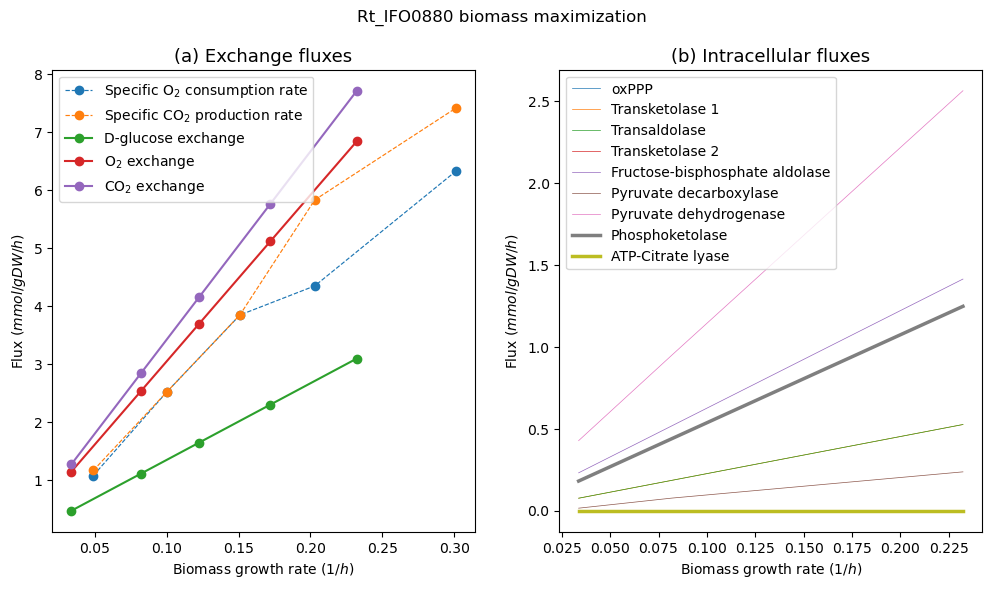

In [12]:
title = 'Rt_IFO0880 biomass maximization'
fig = f.plot_ex_intr_fluxes(IFO_all_fluxes_bm, exchange_fluxes, intracellular_fluxes, phosphoketolase_ACL_fluxes, title, biomass_rxn_ID)

fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_biomass_max.png")

In [11]:
intracellular_fluxes
exchange_fluxes

,D-Glucose exchange,O2 exchange,CO2 exchange
0,-0.476,-1.149964,1.276335
1,-1.114,-2.534822,2.842163
2,-1.648,-3.69407,4.152871
3,-2.305,-5.120337,5.765485
4,-3.1,-6.846184,7.716821


In [8]:
phosphoketolase_ACL_fluxes 

,Phosphoketolase,ATP-Citrate lyase
0,0.181042,0.0
1,0.440304,0.0
2,0.65729,0.0
3,0.924256,0.0
4,1.247297,0.0


COFACTOR balances

In [2]:
glucose_uptakes= [0.476, 1.114, 1.648, 2.305, 3.1] # 
# Cofactor lists
nadphs = ['nadph_c', 'nadph_m', 'nadph_x', 'nadph_r']
nadhs = ['nadh_c', 'nadh_m', 'nadh_x', 'nadh_r']
atps = ['atp_c', 'atp_m', 'atp_x', 'atp_r', 'atp_v', 'atp_n'] 
i1 = 0
i2 = 4

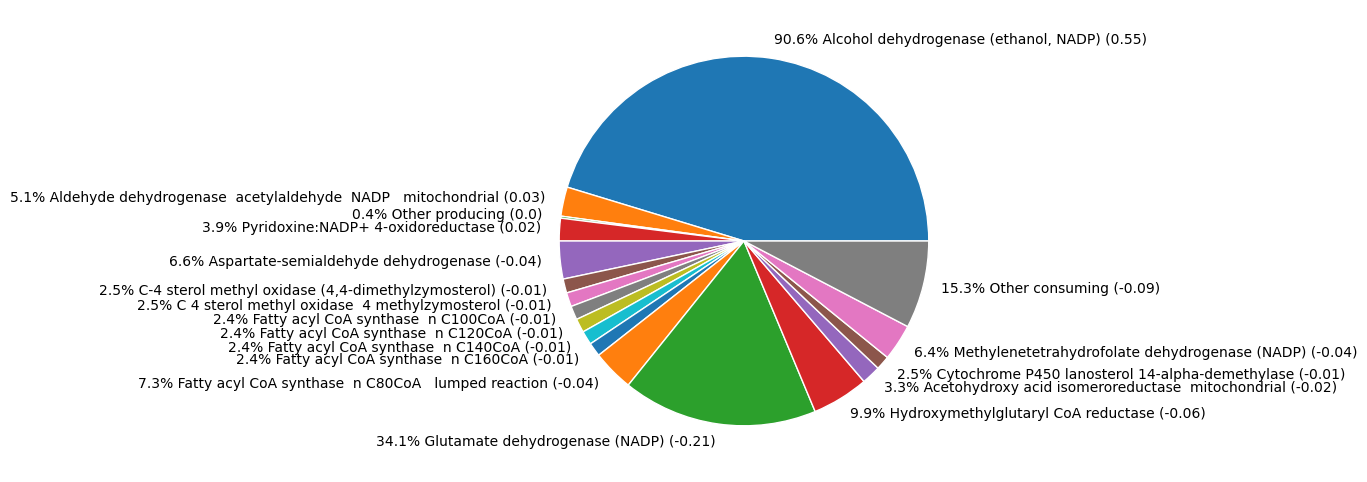

In [16]:

# nadph_fluxes_0 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)

# pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
# #fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_biomass_max_NADPH.png")

# nadph_fluxes_4 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
# pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)
# #fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_biomass_max_NADPH_max.png")

# pie_nadph_fluxes_0
# pie_nadph_fluxes_4


# nadph_fluxes_0 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)

pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_biomass_max_NADPH.png")

# # See on all GR
# nadph_fluxes_1 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, 1, biomass_rxn_ID, glc_ID)
# nadph_fluxes_2 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, 2, biomass_rxn_ID, glc_ID)
# nadph_fluxes_3 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, 3, biomass_rxn_ID, glc_ID)

# pie_nadph_fluxes_1, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_1)
# pie_nadph_fluxes_2, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_2)
# pie_nadph_fluxes_3, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_3)

# nadph_fluxes_4 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
# pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)
# # #fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_biomass_max_NADPH_max.png")

# pie_nadph_fluxes_0
# pie_nadph_fluxes_1
# pie_nadph_fluxes_2
# pie_nadph_fluxes_3
# pie_nadph_fluxes_4

SUM produced: 2.275229582611331, SUM consumed: -2.275229582611331
SUM produced: 13.546953061927669, SUM consumed: -13.546953061927669


([<matplotlib.patches.Wedge at 0x1576ef24680>,
 [Text(1.0691276153906952, 0.2587781714306787, '15.1% 2-oxoglutarate dehydrogenase (2.05)'),
  Text(0.6879586516076118, 0.8583198085085982, '26.7% Glyceraldehyde-3-phosphate dehydrogenase (3.62)'),
  Text(-0.006781656703061688, 1.099979094861517, '16.7% Isocitrate dehydrogenase  NAD (2.26)'),
  Text(-0.5940542732783167, 0.9257966949604924, '19.3% Malate dehydrogenase  mitochondrial (2.61)'),
  Text(-0.8783372018528275, 0.6622112652630924, '3.3% Other producing (0.45)'),
  Text(-1.0517754844815463, 0.32213092096787094, '18.9% Pyruvate dehydrogenase (2.56)'),
  Text(-1.007665943341815, -0.4411454937195331, '26.3% Alcohol dehydrogenase (ethanol) (-3.56)'),
  Text(0.4068237659856705, -1.0220050995123442, '71.6% NADH dehydrogenase, mitochondrial (-9.7)'),
  Text(1.0993710961072698, -0.03719130333693755, '2.2% Other consuming (-0.29)')])

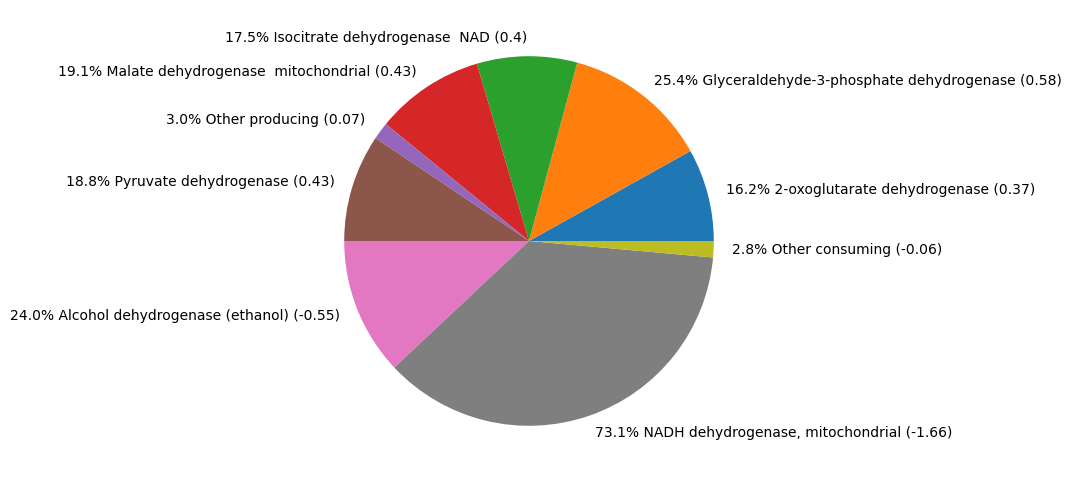

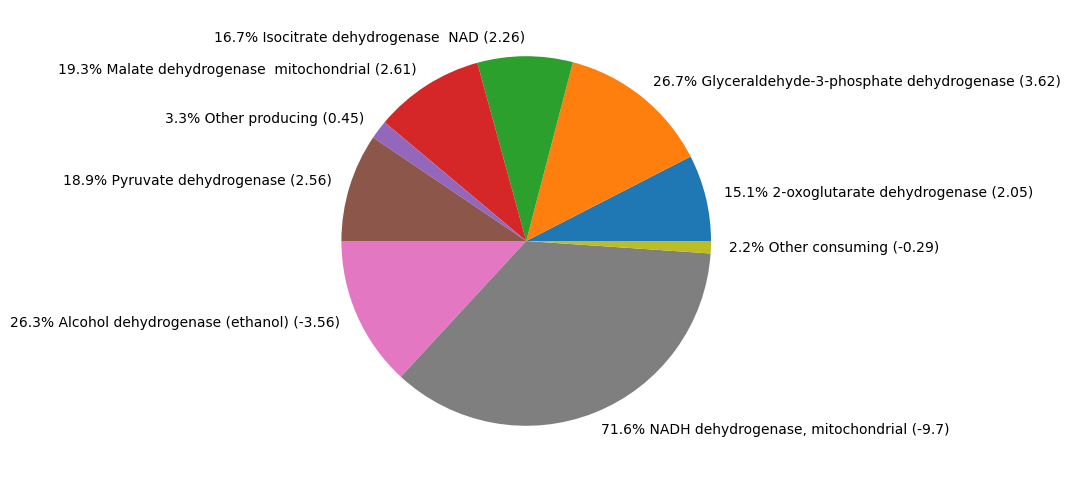

In [11]:
nadh_fluxes_0 = f.cofactor_balances_biomass_max(model_path, nadhs, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)
pie_nadh_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_0)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_bm_NADH_0.png")

nadh_fluxes_4 = f.cofactor_balances_biomass_max(model_path, nadhs, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_nadh_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_4)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_bm_NADH_4.png")

pie_nadh_fluxes_0
pie_nadh_fluxes_4

SUM produced: 8.054412680127125, SUM consumed: -8.05441268012713
SUM produced: 47.5326351828699, SUM consumed: -47.53263518286992


([<matplotlib.patches.Wedge at 0x15773a87590>,
 [Text(1.0990656773658822, 0.045328102059039664, '2.6% Acetate kinase (1.25)'),
  Text(0.286083720507979, 1.06214693186033, '78.0% ATP synthase  mitochondrial (37.08)'),
  Text(-0.9025017831823636, 0.6288803792078856, '0.0% Other producing (0.0)'),
  Text(-0.9711944450636443, 0.516508809099632, '7.6% Phosphoglycerate kinase (3.62)'),
  Text(-1.0652141815616873, 0.27444261221585925, '7.4% Pyruvate kinase (3.54)'),
  Text(-1.0974846268353382, 0.07434711736240199, '4.3% Succinate  CoA ligase  ADP forming (2.05)'),
  Text(-1.0990304808335225, -0.046173609332998085, '2.7% Acetyl-CoA synthetase (-1.27)'),
  Text(-1.08318022584536, -0.1916261942887636, '5.8% Adenylate kinase (-2.76)'),
  Text(-1.048722304915417, -0.33193602873580197, '2.6% ATP maintenance requirement (-1.22)'),
  Text(-0.16627104202297685, -1.0873609982818924, '68.3% Biomass (-32.45)'),
  Text(0.9389911371823801, -0.5729708930590982, '6.5% Hexokinase (D-glucose:ATP) (-3.1)'),
  T

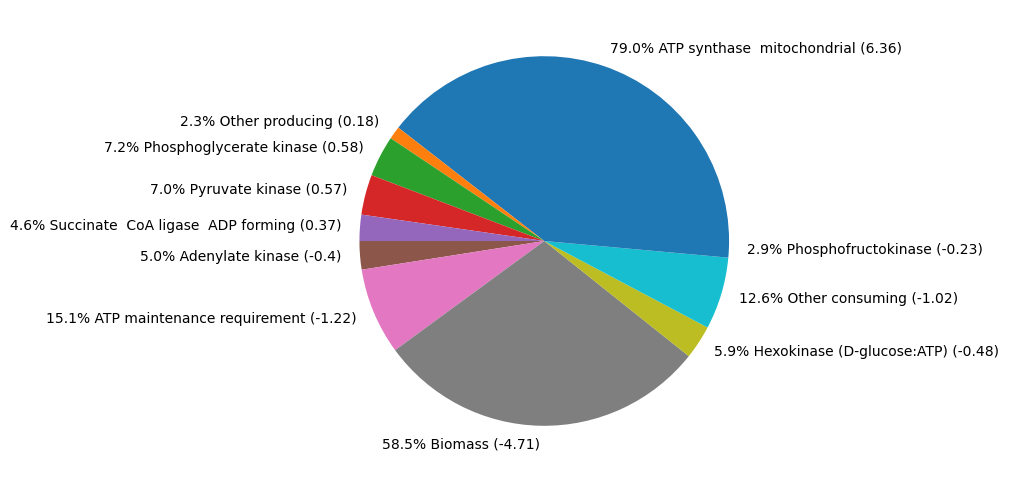

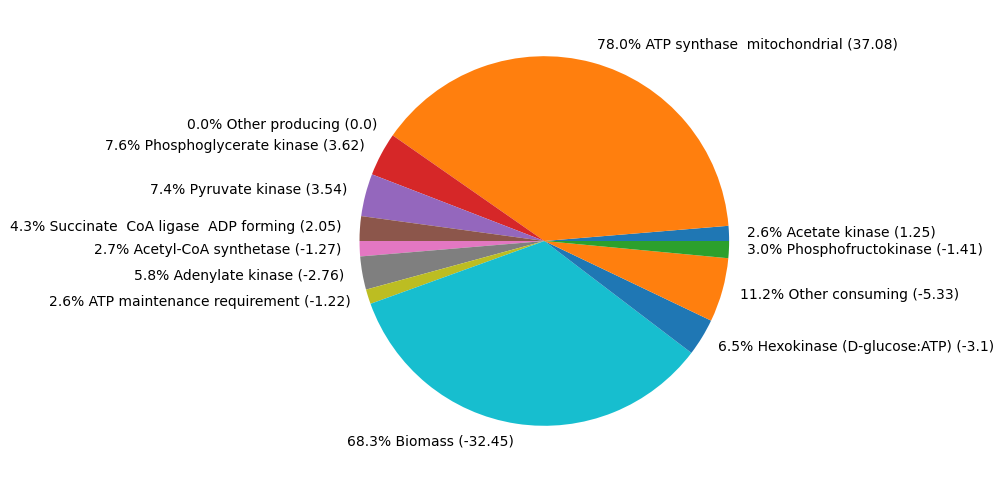

In [12]:
atp_fluxes_0 = f.cofactor_balances_biomass_max(model_path, atps, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)
pie_atp_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_0)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_bm_atp_0.png")

atp_fluxes_4 = f.cofactor_balances_biomass_max(model_path, atps, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_atp_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_4)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_bm_atp_4.png")

pie_atp_fluxes_0
pie_atp_fluxes_4

In [13]:
# import pickle

# with open("../cofactor_comparison/IFO0880_cofactors.pk", "wb") as f:
#     pickle.dump([nadph_fluxes_lowest_GR, nadph_fluxes_highest_GR, nadh_fluxes_lowest_GR, nadh_fluxes_highest_GR, atp_fluxes_lowest_GR, atp_fluxes_highest_GR], f)

In [14]:
# # Get all fluxes to excel

# #  Get all flux values separately for dif growth rates, make them to a csv file

### NGAM minimisation

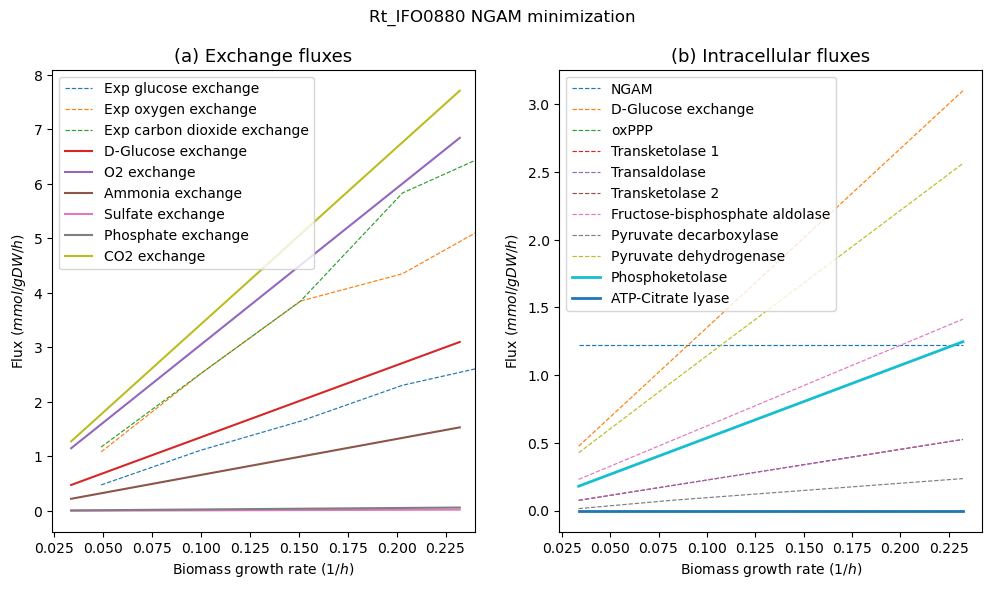

In [4]:
NGAM_rxn_ID = "ATPM"

ngam_IFO_all_fluxes = f.all_fluxes_NGAM_min_df(model_path, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID)

# Extract exchange fluxes and intracellular fluxes.  
# NB! Extract the flux of phosphoketolase and ACL separately for distinct visualization on figures
exchange_metabolites = ['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']
exchange_fluxes = f.metabolites_fluxes(model_path, ngam_IFO_all_fluxes, exchange_metabolites)

intracellular_metabolites = ['ATPM', 'EX_glc__D_e', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'FBA', 'PYRDC','PDHm']
intracellular_fluxes = f.metabolites_fluxes(model_path, ngam_IFO_all_fluxes, intracellular_metabolites)

phosphoketolase_ACL_fluxes = f.metabolites_fluxes(model_path, ngam_IFO_all_fluxes, ['XPK', 'ACITL'])

title = 'Rt_IFO0880 NGAM minimization'
fig = f.plot_ex_intr_fluxes(ngam_IFO_all_fluxes, exchange_fluxes, intracellular_fluxes, phosphoketolase_ACL_fluxes, title, biomass_rxn_ID)

#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_NGAM_min.png")


COFACTOR balances

SUM produced: 0.6029655918074088, SUM consumed: -0.6029655918074087
SUM produced: 1.4227876889046114, SUM consumed: -1.4227876889056372


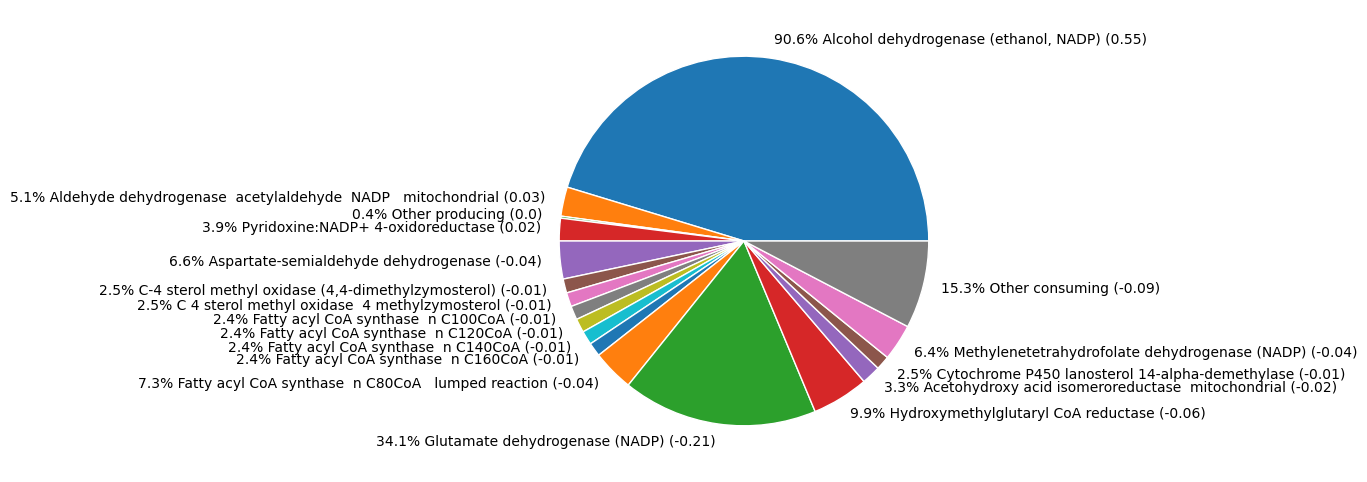

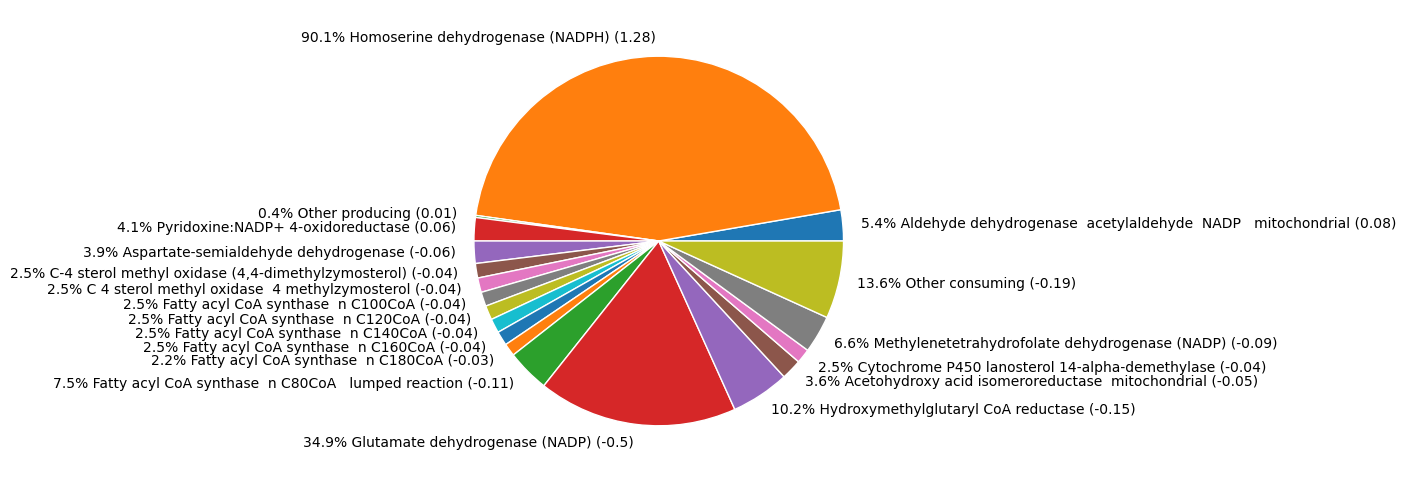

In [23]:
NGAM_rxn_ID = "ATPM"

# NGAM_rxn_ID = 'ATPM'
# nadph_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)

# pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
# #fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_nm_NADPH.png")

# nadph_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
# pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)
# #fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_nm_NADPH_max.png")

# pie_nadph_fluxes_0
# pie_nadph_fluxes_4



nadph_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)

pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_nm_NADPH.png")

nadph_fluxes_1 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, 1)
pie_nadph_fluxes_1, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_1)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_nm_NADPH1.png")

 
# nadph_fluxes_2 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, 2)
# pie_nadph_fluxes_2, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_2)

# nadph_fluxes_3 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, 3)
# pie_nadph_fluxes_3, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_3) 

# nadph_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
# pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)
 
# pie_nadph_fluxes_0
# pie_nadph_fluxes_1
# pie_nadph_fluxes_2
# pie_nadph_fluxes_3
# pie_nadph_fluxes_4

SUM produced: 2.2752295826126567, SUM consumed: -2.275229582615516
SUM produced: 13.546953061936275, SUM consumed: -13.546953061936273


([<matplotlib.patches.Wedge at 0x15777d704d0>,
 [Text(1.0691276153906952, 0.2587781714306787, '15.1% 2-oxoglutarate dehydrogenase (2.05)'),
  Text(0.6879586516076118, 0.8583198085085982, '26.7% Glyceraldehyde-3-phosphate dehydrogenase (3.62)'),
  Text(-0.006781656703061688, 1.099979094861517, '16.7% Isocitrate dehydrogenase  NAD (2.26)'),
  Text(-0.5940542732783167, 0.9257966949604924, '19.3% Malate dehydrogenase  mitochondrial (2.61)'),
  Text(-0.8783372018528275, 0.6622112652630924, '3.3% Other producing (0.45)'),
  Text(-1.0517754844815463, 0.32213092096787094, '18.9% Pyruvate dehydrogenase (2.56)'),
  Text(-1.007665943341815, -0.4411454937195331, '26.3% Alcohol dehydrogenase (ethanol) (-3.56)'),
  Text(0.4068237659856705, -1.0220050995123442, '71.6% NADH dehydrogenase, mitochondrial (-9.7)'),
  Text(1.0993710961072698, -0.03719130333693755, '2.2% Other consuming (-0.29)')])

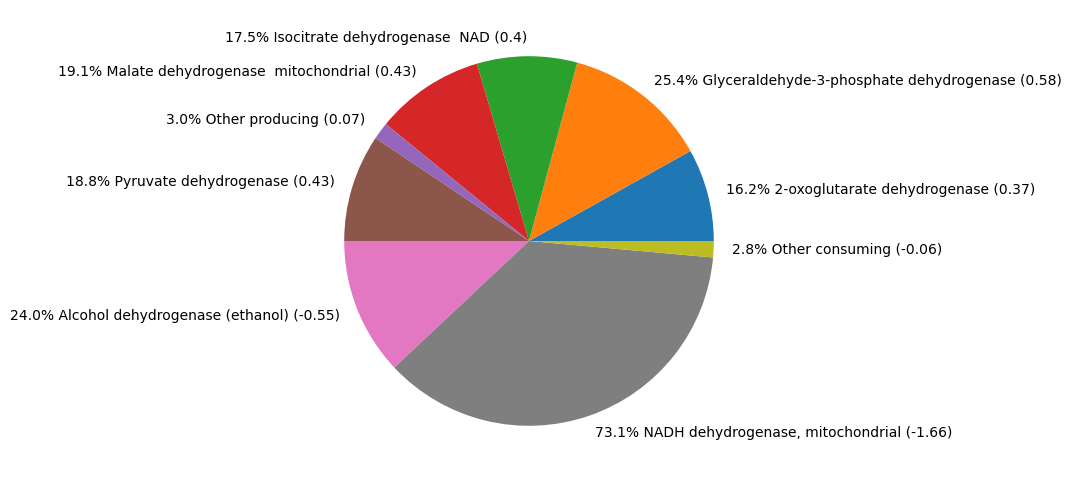

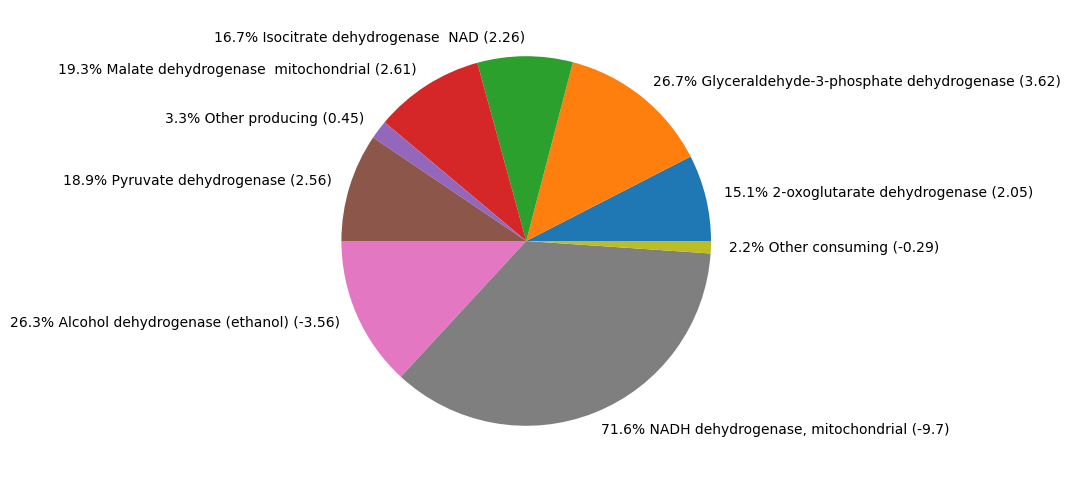

In [17]:
nadh_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, nadhs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)
pie_nadh_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_0)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_nm_NADH_0.png")

nadh_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, nadhs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_nadh_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_4)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_nm_NADH_4.png")

pie_nadh_fluxes_0
pie_nadh_fluxes_4

SUM produced: 8.05441268013094, SUM consumed: -8.054412680130943
SUM produced: 47.53263518290935, SUM consumed: -47.53263518290937


([<matplotlib.patches.Wedge at 0x1577de80f50>,
 [Text(1.0990656773658822, 0.045328102059039664, '2.6% Acetate kinase (1.25)'),
  Text(0.286083720507979, 1.06214693186033, '78.0% ATP synthase  mitochondrial (37.08)'),
  Text(-0.9025017831823636, 0.6288803792078856, '0.0% Other producing (0.0)'),
  Text(-0.9711944450636443, 0.516508809099632, '7.6% Phosphoglycerate kinase (3.62)'),
  Text(-1.0652141815616873, 0.27444261221585925, '7.4% Pyruvate kinase (3.54)'),
  Text(-1.0974846268353382, 0.07434711736240199, '4.3% Succinate  CoA ligase  ADP forming (2.05)'),
  Text(-1.0990304808335225, -0.046173609332998085, '2.7% Acetyl-CoA synthetase (-1.27)'),
  Text(-1.08318022584536, -0.1916261942887636, '5.8% Adenylate kinase (-2.76)'),
  Text(-1.048722304915417, -0.33193602873580197, '2.6% ATP maintenance requirement (-1.22)'),
  Text(-0.16627104202297685, -1.0873609982818924, '68.3% Biomass (-32.45)'),
  Text(0.9389911371823801, -0.5729708930590982, '6.5% Hexokinase (D-glucose:ATP) (-3.1)'),
  T

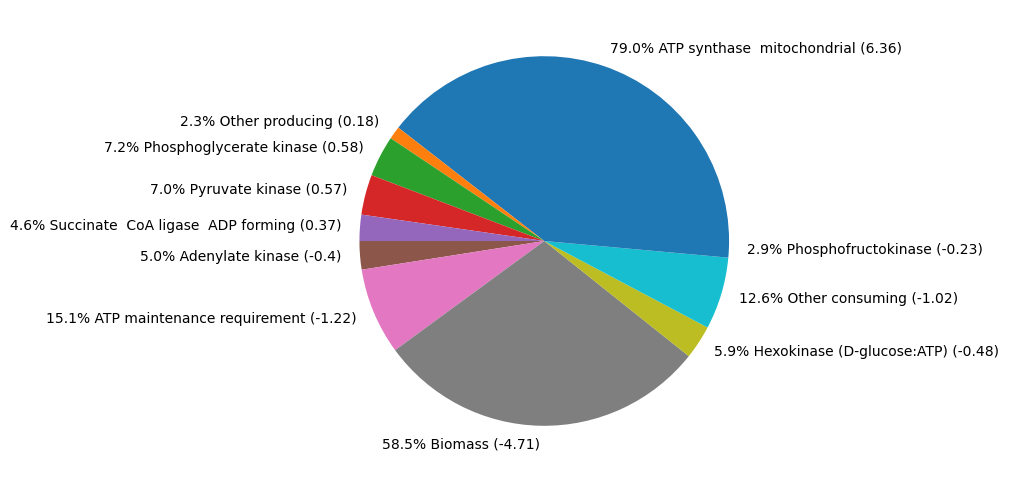

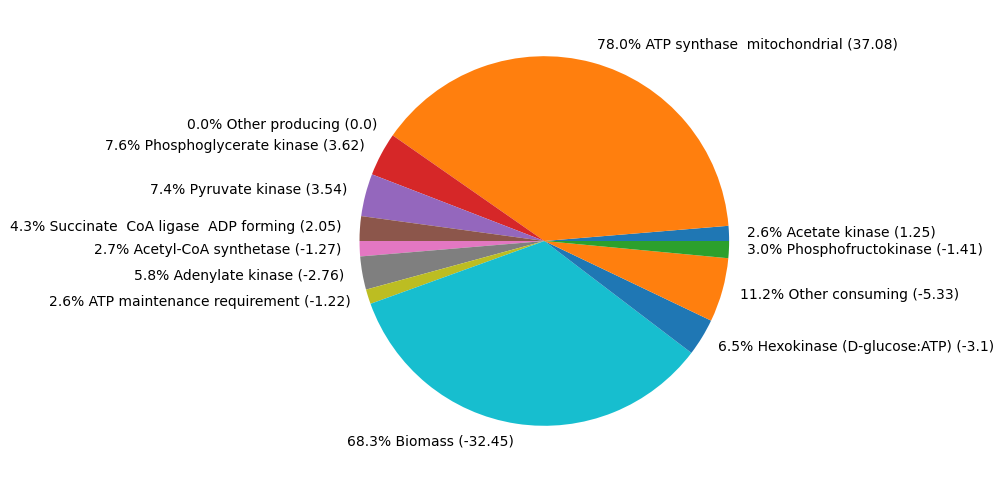

In [18]:
atp_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, atps, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)
pie_atp_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_0)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_nm_atp_0.png") 

atp_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, atps, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_atp_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_4)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_nm_atp_4.png")

pie_atp_fluxes_0
pie_atp_fluxes_4

In [19]:
# All NGAM min fluxes to excel

# path = 
# f.all_fluxes_to_excel(path, ngam_IFO_all_fluxes)